In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def date_gen(p) :
    dates = pd.date_range(start="2023-01-01", periods=p, freq='D')
    values = np.random.randn(p)

    return pd.DataFrame({
        'Date' : dates,
        'Value' : values
    })

data = date_gen(500)

In [3]:
window_size = 7
data["MovingAvg"] = data['Value'].rolling(window=window_size).mean()
data['MovingStd'] = data['Value'].rolling(window=window_size).std()

In [4]:
threshold_mult = 2
data["Threshold"] = data['MovingAvg'] + threshold_mult * data['MovingStd']


data['Outlier'] = data['Value'] > data['Threshold']
print(data)

          Date     Value  MovingAvg  MovingStd  Threshold  Outlier
0   2023-01-01  0.954516        NaN        NaN        NaN    False
1   2023-01-02  0.433304        NaN        NaN        NaN    False
2   2023-01-03  1.988392        NaN        NaN        NaN    False
3   2023-01-04 -0.102552        NaN        NaN        NaN    False
4   2023-01-05 -1.243022        NaN        NaN        NaN    False
..         ...       ...        ...        ...        ...      ...
495 2024-05-10  0.582163  -0.324077   1.522650   2.721223    False
496 2024-05-11 -0.581468   0.051918   0.879303   1.810524    False
497 2024-05-12 -1.855464  -0.072437   1.087332   2.102227    False
498 2024-05-13 -0.156414  -0.230491   0.990002   1.749513    False
499 2024-05-14  0.569779  -0.333693   0.829450   1.325207    False

[500 rows x 6 columns]


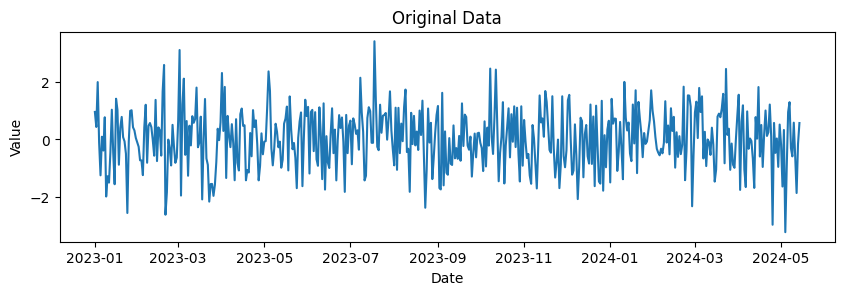

In [5]:
# 시계열 데이터 시각화
plt.figure(figsize=(10, 6))

 

# 원본 데이터 그래프
plt.subplot(2, 1, 1)
plt.plot(data['Date'], data['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Data')
plt.show()

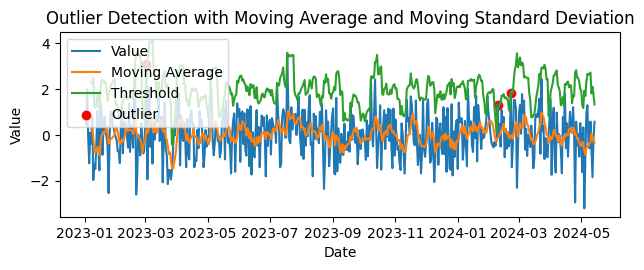

In [7]:
# 이동 평균, 이동 표준편차, 임계값, 이상치 그래프
plt.subplot(2, 1, 2)
plt.plot(data['Date'], data['Value'], label='Value')
plt.plot(data['Date'], data['MovingAvg'], label='Moving Average')
plt.plot(data['Date'], data['Threshold'], label='Threshold')
plt.scatter(data[data['Outlier']]['Date'], data[data['Outlier']]['Value'], color='red', label='Outlier')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection with Moving Average and Moving Standard Deviation')
plt.legend()

 

plt.tight_layout()

In [8]:
values = [10, 12, 11,15, 9, 13, 8, 14, 10, 16] + [10]*90
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')

data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})



In [10]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(data['Value'], trend='add')
model_fit = model.fit()

In [11]:
trend = model_fit.predict(start=0, end=len(data['Value']) - 1)

deviation = data['Value'] - trend

In [20]:
from scipy import stats

data = date_gen(100)
data.loc[0:100, 'Value'] = data.loc[0:100, 'Value']*10
data.loc[20, 'Value'] = 50

In [21]:
print(data)

         Date      Value
0  2023-01-01  -0.454477
1  2023-01-02  14.117554
2  2023-01-03   7.818936
3  2023-01-04  -5.597370
4  2023-01-05   5.537715
..        ...        ...
95 2023-04-06   3.018045
96 2023-04-07 -12.116409
97 2023-04-08  16.097363
98 2023-04-09   0.375357
99 2023-04-10   2.850773

[100 rows x 2 columns]


In [22]:
z_scores = np.abs(stats.zscore(data['Value']))

threshold = 3
outliers = z_scores >threshold

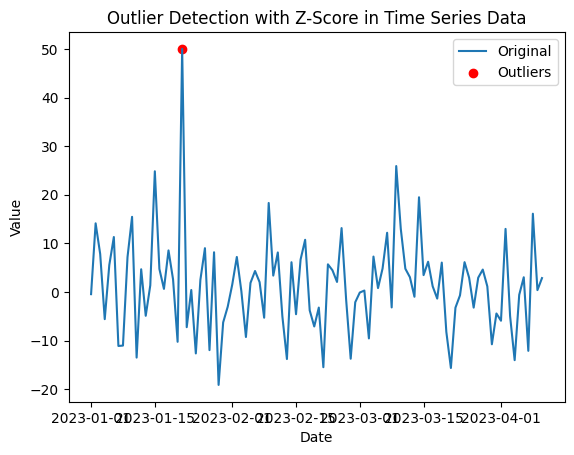

Detected Outliers:
20    50.0
Name: Value, dtype: float64


In [23]:
# 이상치 시각화 
plt.plot(data['Date'], data['Value'], label='Original')
plt.scatter(data[outliers]['Date'], data[outliers]['Value'], color='red', label='Outliers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection with Z-Score in Time Series Data')
plt.legend()
plt.show()

 

# 이상치 출력 
outlier_values = data[outliers]['Value']
print("Detected Outliers:")
print(outlier_values)

##Time Series Data 

In [24]:

values = [10, 12, 11,15, 9, 13, 8, 14, 10, 16] *10
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')

data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
period = 7

res = seasonal_decompose(data['Value'], model='additive', period=period)

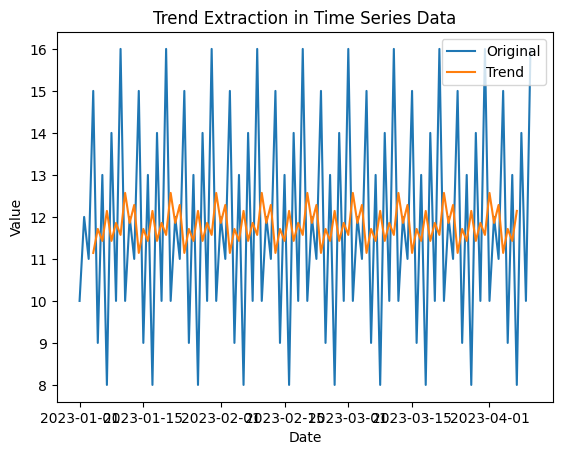

In [28]:
trend = res.trend

 

# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.plot(data['Date'], trend, label='Trend')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Trend Extraction in Time Series Data')
plt.legend()
plt.show()